In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
font = r'/home/brltt/Documents/PythonNotes/DADOS/MICRODADOS_ENEM_2019.csv'
renda_ordenada = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q']
colunas = ['Q025', 'Q006', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_REDACAO', 'SG_UF_RESIDENCIA']
provas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']

chunksize = 10 ** 4
chunks = []
dados_total = pd.DataFrame()

for chunk in pd.read_csv(font, chunksize=chunksize, encoding='latin9', usecols=colunas, sep=';'):
    chunks.append(chunk)

dados_total = pd.concat(chunks)
del chunks
dados_total['NU_NOTA_TOTAL'] = dados_total[provas].sum(axis=1)

In [3]:
dados_sem_nota_zero = dados_total.query("NU_NOTA_TOTAL != 0")

<AxesSubplot:xlabel='NU_NOTA_TOTAL', ylabel='Count'>

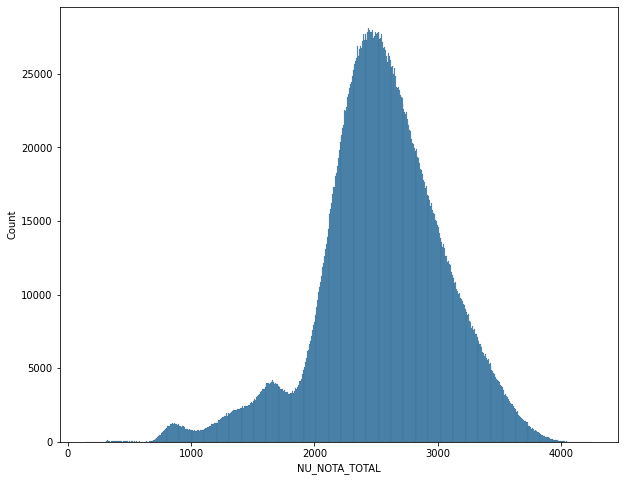

In [4]:
plt.figure(figsize=(10,8))
sns.histplot(dados_sem_nota_zero, x="NU_NOTA_TOTAL")

<AxesSubplot:xlabel='NU_NOTA_LC', ylabel='Count'>

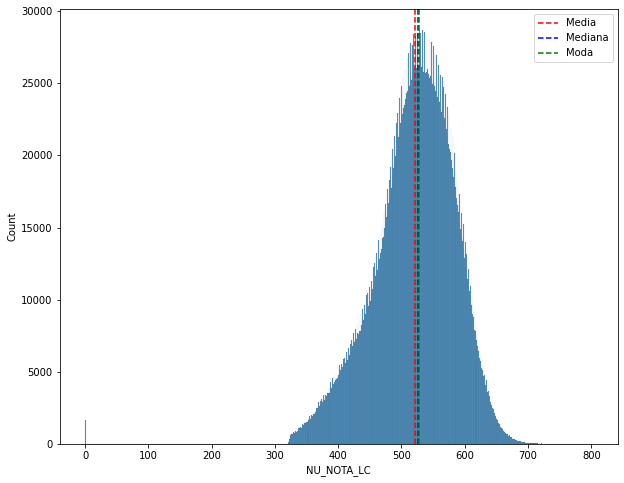

In [5]:
media=dados_sem_nota_zero['NU_NOTA_LC'].mean()
mediana=dados_sem_nota_zero['NU_NOTA_LC'].median()
moda=dados_sem_nota_zero['NU_NOTA_LC'].mode()[0]

plt.figure(figsize=(10,8))
plt.axvline(media, color='r', linestyle='--', label = "Media")
plt.axvline(mediana, color='b', linestyle='--', label = "Mediana")
plt.axvline(moda, color='g', linestyle='--', label = "Moda")

plt.legend()

sns.histplot(dados_sem_nota_zero, x="NU_NOTA_LC")

<AxesSubplot:xlabel='NU_NOTA_MT', ylabel='Count'>

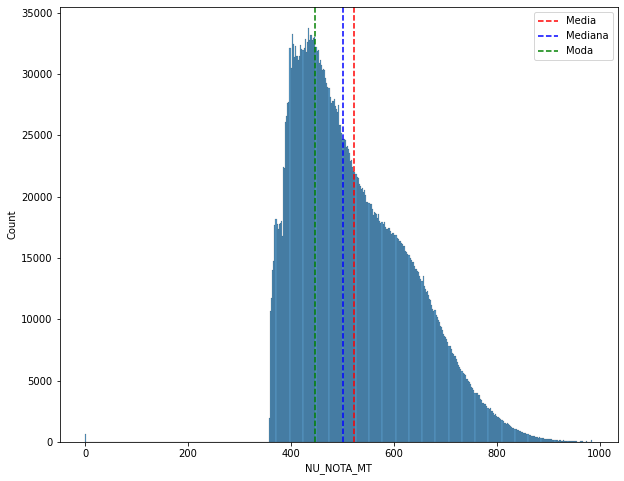

In [6]:
media=dados_sem_nota_zero['NU_NOTA_MT'].mean()
mediana=dados_sem_nota_zero['NU_NOTA_MT'].median()
moda=dados_sem_nota_zero['NU_NOTA_MT'].mode()[0]

plt.figure(figsize=(10,8))
plt.axvline(media, color='r', linestyle='--', label = "Media")
plt.axvline(mediana, color='b', linestyle='--', label = "Mediana")
plt.axvline(moda, color='g', linestyle='--', label = "Moda")

plt.legend()

sns.histplot(dados_sem_nota_zero, x="NU_NOTA_MT")

<AxesSubplot:xlabel='NU_NOTA_TOTAL', ylabel='Count'>

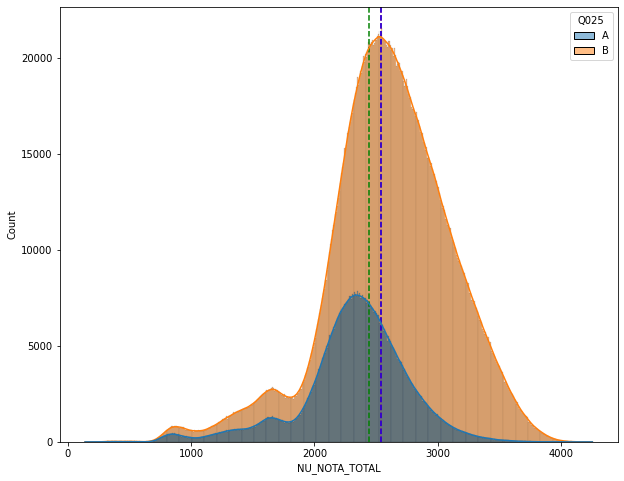

In [7]:
media=dados_sem_nota_zero['NU_NOTA_TOTAL'].mean()
mediana=dados_sem_nota_zero['NU_NOTA_TOTAL'].median()
moda=dados_sem_nota_zero['NU_NOTA_TOTAL'].mode()[0]

plt.figure(figsize=(10,8))
plt.axvline(media, color='r', linestyle='--', label = "Media")
plt.axvline(mediana, color='b', linestyle='--', label = "Mediana")
plt.axvline(moda, color='g', linestyle='--', label = "Moda")

plt.legend()

sns.histplot(dados_sem_nota_zero, x="NU_NOTA_TOTAL", hue="Q025", kde=True)

<AxesSubplot:xlabel='NU_NOTA_TOTAL', ylabel='Density'>

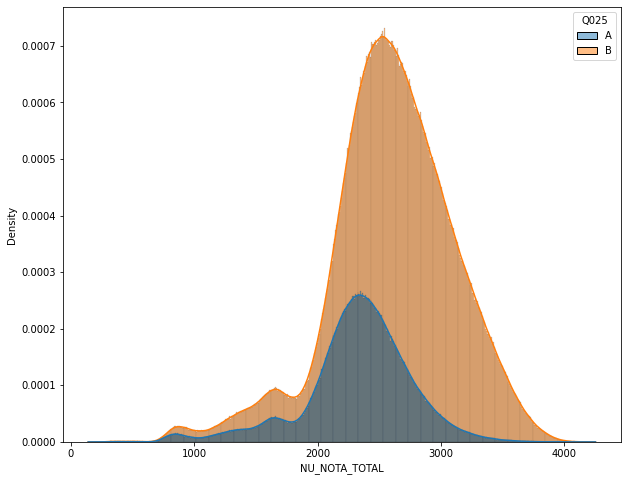

In [8]:
plt.figure(figsize=(10,8))
sns.histplot(dados_sem_nota_zero, x="NU_NOTA_TOTAL", hue="Q025", kde=True, stat="density")

<AxesSubplot:xlabel='NU_NOTA_TOTAL', ylabel='Probability'>

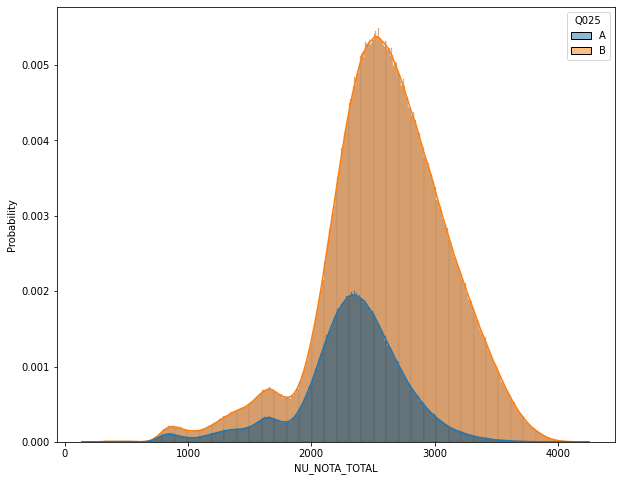

In [9]:
plt.figure(figsize=(10,8))
sns.histplot(dados_sem_nota_zero, x="NU_NOTA_TOTAL", hue="Q025", kde=True, stat="probability")

<AxesSubplot:xlabel='NU_NOTA_TOTAL', ylabel='Probability'>

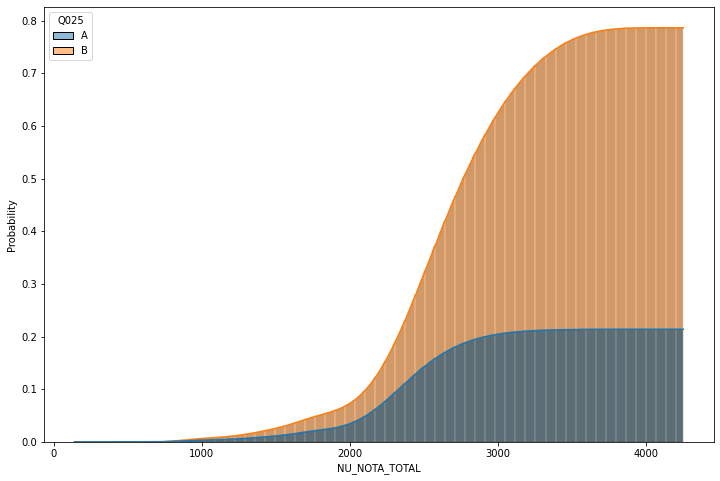

In [10]:
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_nota_zero, x="NU_NOTA_TOTAL", hue="Q025", kde=True, stat="probability", cumulative=True)

(300.0, 1050.0)

/usr/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


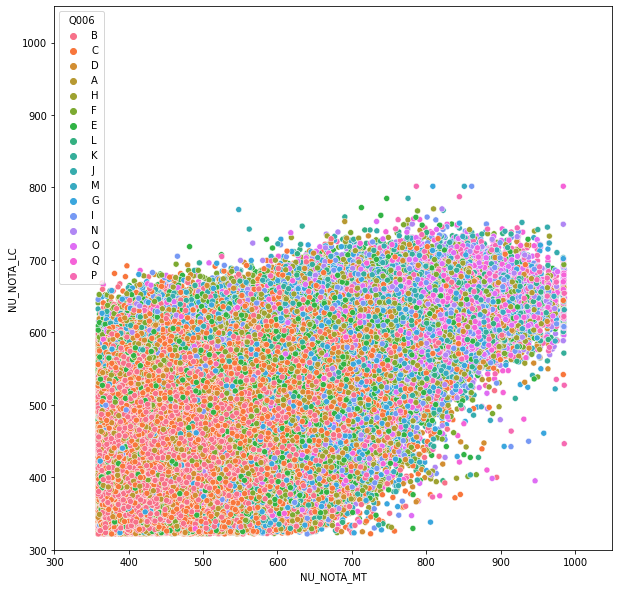

In [11]:
plt.figure(figsize=(10,10))
sns.scatterplot(data = dados_sem_nota_zero, x="NU_NOTA_MT", y="NU_NOTA_LC", hue="Q006")
plt.xlim((300, 1050))
plt.ylim((300, 1050))

(300.0, 1050.0)

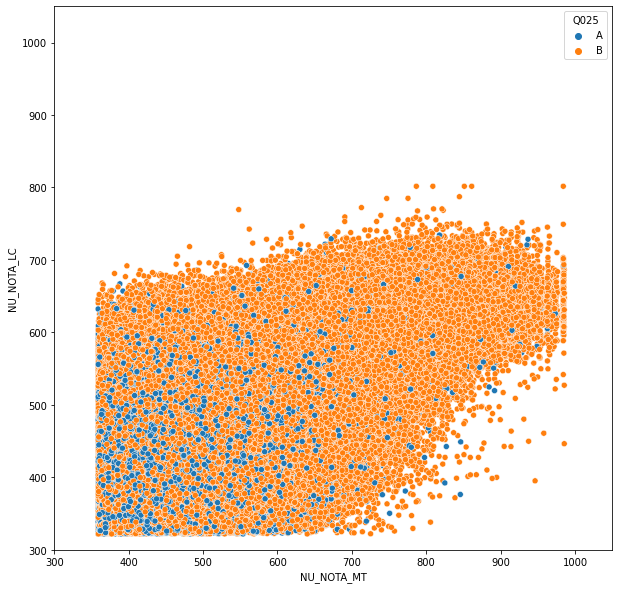

In [12]:
plt.figure(figsize=(10,10))
sns.scatterplot(data = dados_sem_nota_zero, x="NU_NOTA_MT", y="NU_NOTA_LC", hue="Q025")
plt.xlim((300, 1050))
plt.ylim((300, 1050))

<Figure size 720x720 with 0 Axes>

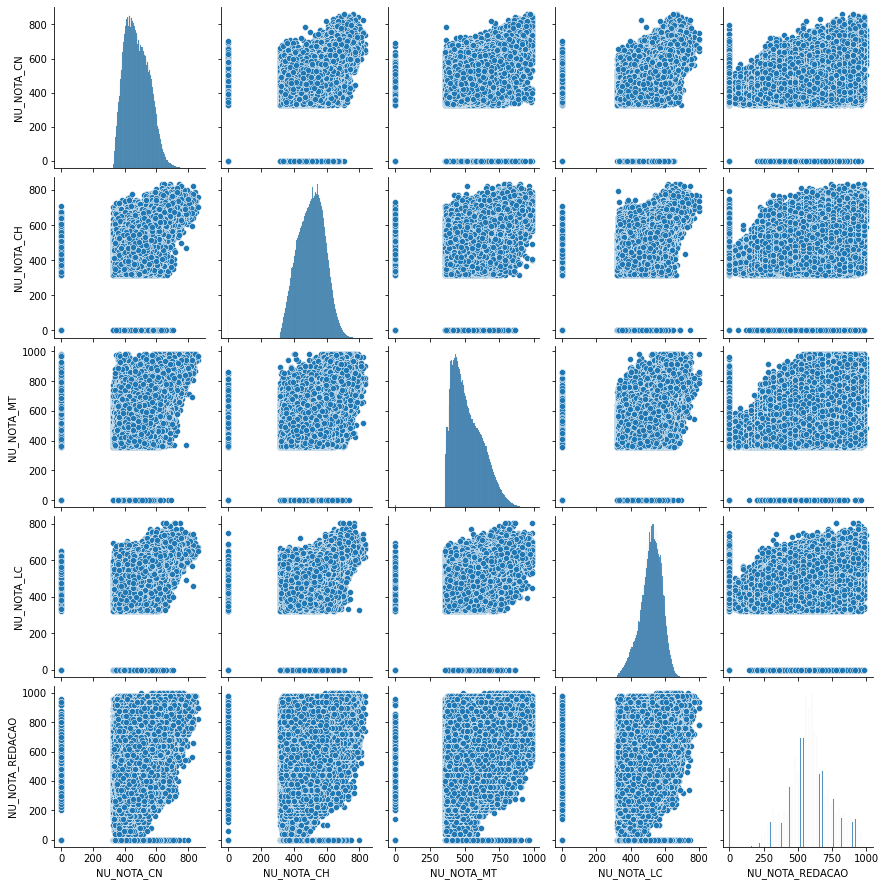

In [13]:
plt.figure(figsize=(10,10))
sns.pairplot(data = dados_sem_nota_zero[provas])

<AxesSubplot:>

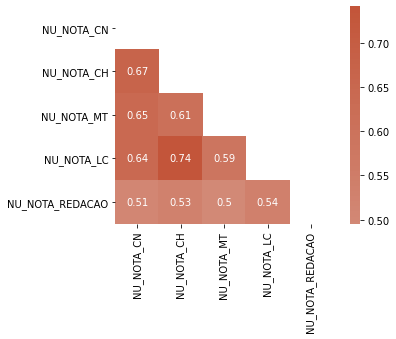

In [15]:
correlacao = dados_sem_nota_zero[provas].corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)
mask = np.triu(np.ones_like(correlacao, dtype=bool))
sns.heatmap(correlacao, mask=mask, cmap=cmap, center=0, annot=True, square=True)

In [21]:
dados_rs = dados_sem_nota_zero.query("SG_UF_RESIDENCIA == 'RS'")

In [22]:
dados_rs

,SG_UF_RESIDENCIA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q006,Q025,NU_NOTA_TOTAL
19313,RS,377.2,488.5,449.1,427.7,680.0,D,B,2422.5
21082,RS,406.7,348.1,374.3,439.7,500.0,C,A,2068.8
32968,RS,491.9,533.1,516.9,581.8,580.0,C,A,2703.7
39020,RS,498.0,582.1,544.5,680.7,760.0,M,B,3065.3
67449,RS,NaN,648.0,600.6,NaN,360.0,G,B,1608.6
...,...,...,...,...,...,...,...,...,...
5094536,RS,455.6,536.8,557.9,469.3,580.0,H,B,2599.6
5094537,RS,549.5,583.9,573.1,540.7,660.0,D,B,2907.2
5094539,RS,NaN,443.5,495.6,NaN,520.0,C,B,1459.1
5094540,RS,605.4,583.4,569.4,571.4,880.0,G,B,3209.6


<AxesSubplot:xlabel='NU_NOTA_TOTAL', ylabel='Count'>

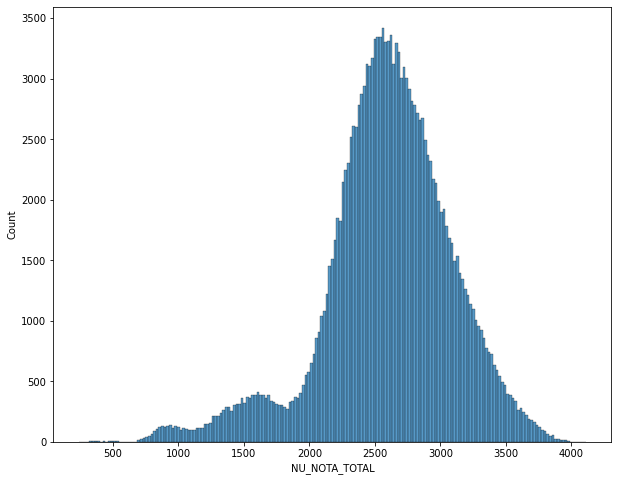

In [23]:
plt.figure(figsize=(10,8))
sns.histplot(dados_rs, x="NU_NOTA_TOTAL")

<Figure size 720x720 with 0 Axes>

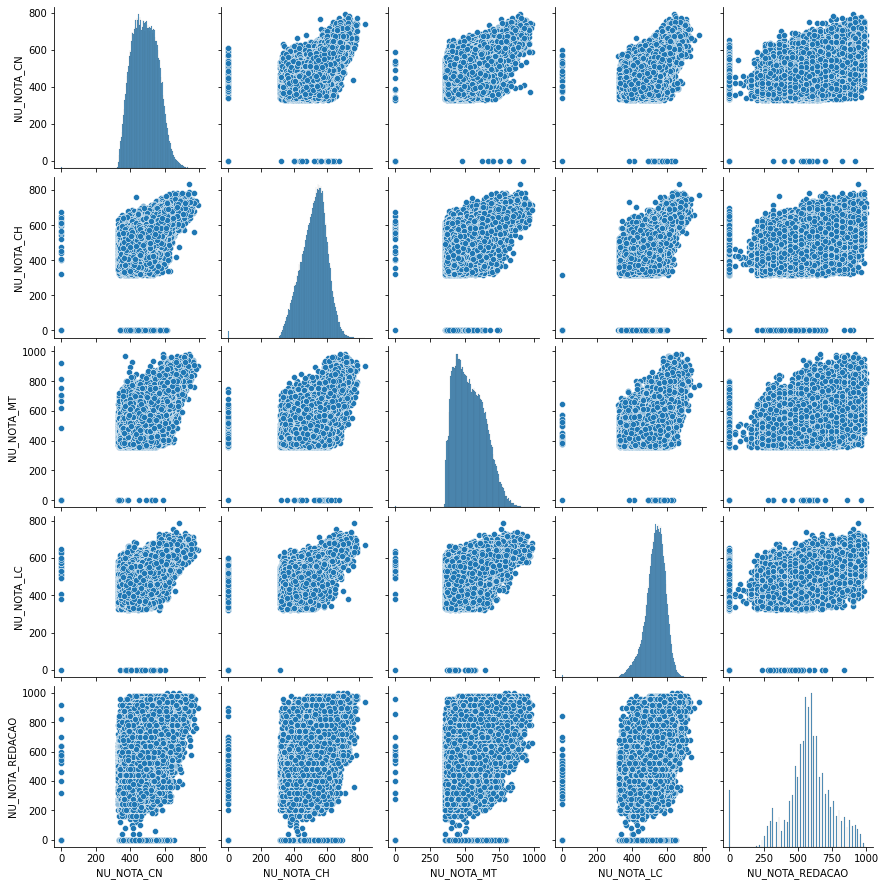

In [25]:
plt.figure(figsize=(10,10))
sns.pairplot(data = dados_rs[provas])

<AxesSubplot:>

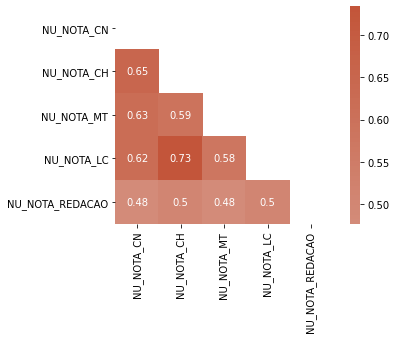

In [26]:
correlacao = dados_rs[provas].corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)
mask = np.triu(np.ones_like(correlacao, dtype=bool))
sns.heatmap(correlacao, mask=mask, cmap=cmap, center=0, annot=True, square=True)

<AxesSubplot:>

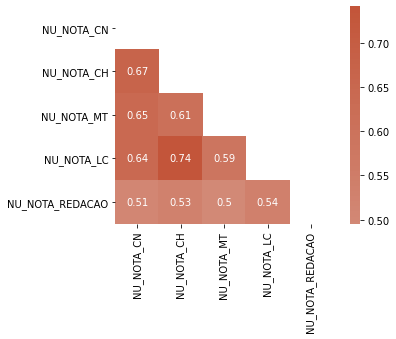

In [27]:
correlacao = dados_sem_nota_zero[provas].corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)
mask = np.triu(np.ones_like(correlacao, dtype=bool))
sns.heatmap(correlacao, mask=mask, cmap=cmap, center=0, annot=True, square=True)